In [3]:
import pandas as pd
data = pd.read_csv('Expanded.csv')
data.head(1)

,question,zephyr3b_shard,llama2_7b,llama2_shard,tiny_llama,rocket_3b,marx_3b,stablelm_3b,zephyr3b_shard_eval,llama2_7b_eval,...,rocket_3b_evalanswer_formatting,rocket_3b_evalcontext_understanding,marx_3b_evalanswer_correctness,marx_3b_evalanswer_length,marx_3b_evalanswer_formatting,marx_3b_evalcontext_understanding,stablelm_3b_evalanswer_correctness,stablelm_3b_evalanswer_length,stablelm_3b_evalanswer_formatting,stablelm_3b_evalcontext_understanding
0,What are the main services offered by banks?,answer: Banks offer a wide range of financial...,Banks offer various services to their customer...,Banks offer a wide range of services to thei...,"Banks provide a variety of services, including...","As an AI language model, I do not offer any sp...",Banks offer a wide array of financial products...,The main services offered by banks include che...,"{'answer_correctness': 9.5, 'answer_length': 9...","{'answer_correctness': 9.5, 'answer_length': 1...",...,4.5,5.0,9.5,9.0,4.5,5.0,9.5,9.0,4.5,5.0


In [2]:
data.columns

Index(['question', 'zephyr3b_shard', 'llama2_7b', 'llama2_shard', 'tiny_llama',
       'rocket_3b', 'marx_3b', 'stablelm_3b', 'zephyr3b_shard_eval',
       'llama2_7b_eval', 'llama2_shard_eval', 'tiny_llama_eval',
       'rocket_3b_eval', 'marx_3b_eval', 'stablelm_3b_eval',
       'zephyr3b_shard_evalanswer_correctness',
       'zephyr3b_shard_evalanswer_length',
       'zephyr3b_shard_evalanswer_formatting',
       'zephyr3b_shard_evalcontext_understanding',
       'llama2_7b_evalanswer_correctness', 'llama2_7b_evalanswer_length',
       'llama2_7b_evalanswer_formatting',
       'llama2_7b_evalcontext_understanding',
       'llama2_shard_evalanswer_correctness', 'llama2_shard_evalanswer_length',
       'llama2_shard_evalanswer_formatting',
       'llama2_shard_evalcontext_understanding',
       'tiny_llama_evalanswer_correctness', 'tiny_llama_evalanswer_length',
       'tiny_llama_evalanswer_formatting',
       'tiny_llama_evalcontext_understanding',
       'rocket_3b_evalanswer_corre

In [9]:
base = sum(data['llama2_shard_evalanswer_correctness'])
params = ['answer_correctness', 'answer_length', 'answer_formatting', 'context_understanding']

# for col in data.columns:
#     if 'answer_corr' in col:
#         print(f'{col} = {100* (sum(data[col]) - base)/base} %')

for param in params:
    print(param, '\n')
    tmp = 'llama2_shard_eval' + param
    base = sum(data[tmp])

    for col in data.columns:
        if param in col:
            print(f'{col} = {100* (sum(data[col]) - base)/base} %')

    print()

answer_correctness 

zephyr3b_shard_evalanswer_correctness = -28.07570977917981 %
llama2_7b_evalanswer_correctness = 0.4206098843322818 %
llama2_shard_evalanswer_correctness = 0.0 %
tiny_llama_evalanswer_correctness = -64.35331230283911 %
rocket_3b_evalanswer_correctness = -47.423764458464774 %
marx_3b_evalanswer_correctness = -2.2082018927444795 %
stablelm_3b_evalanswer_correctness = -0.7360672975814931 %

answer_length 

zephyr3b_shard_evalanswer_length = -30.85427135678392 %
llama2_7b_evalanswer_length = -2.2110552763819094 %
llama2_shard_evalanswer_length = 0.0 %
tiny_llama_evalanswer_length = -66.03015075376885 %
rocket_3b_evalanswer_length = -24.22110552763819 %
marx_3b_evalanswer_length = -20.402010050251256 %
stablelm_3b_evalanswer_length = -12.30150753768844 %

answer_formatting 

zephyr3b_shard_evalanswer_formatting = -22.717622080679405 %
llama2_7b_evalanswer_formatting = 3.6093418259023355 %
llama2_shard_evalanswer_formatting = 0.0 %
tiny_llama_evalanswer_formatting = -56.4

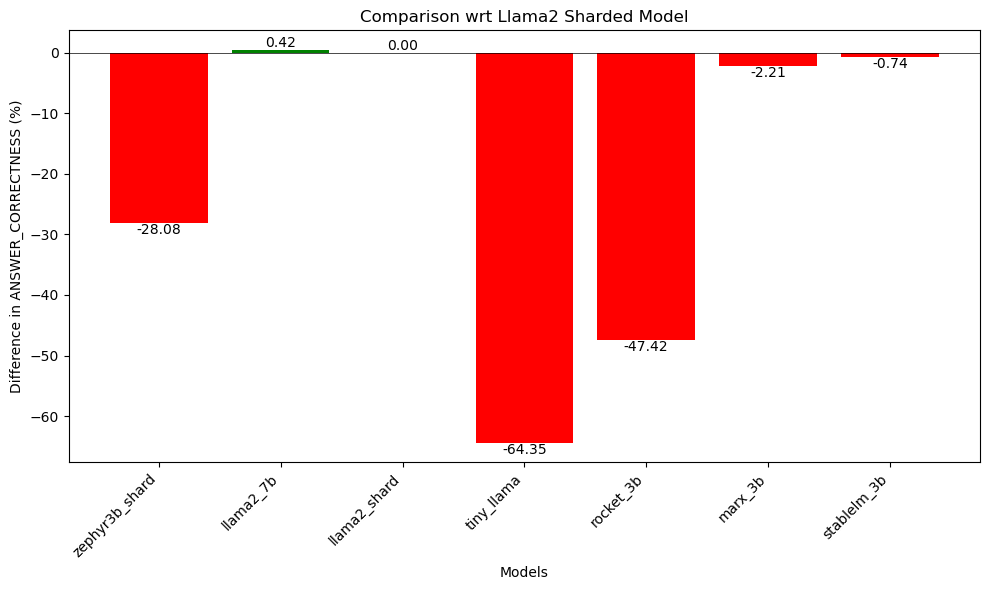

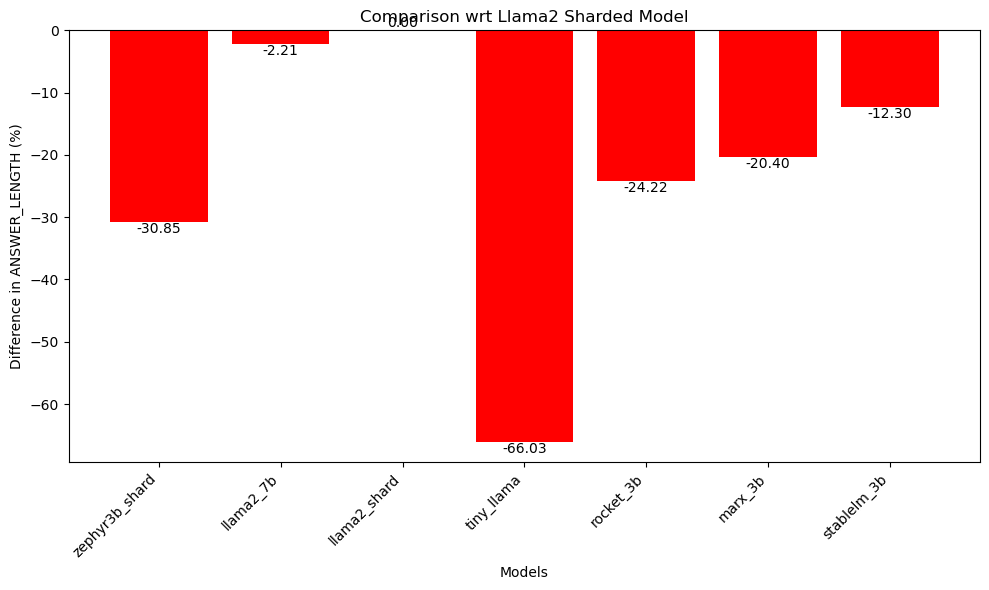

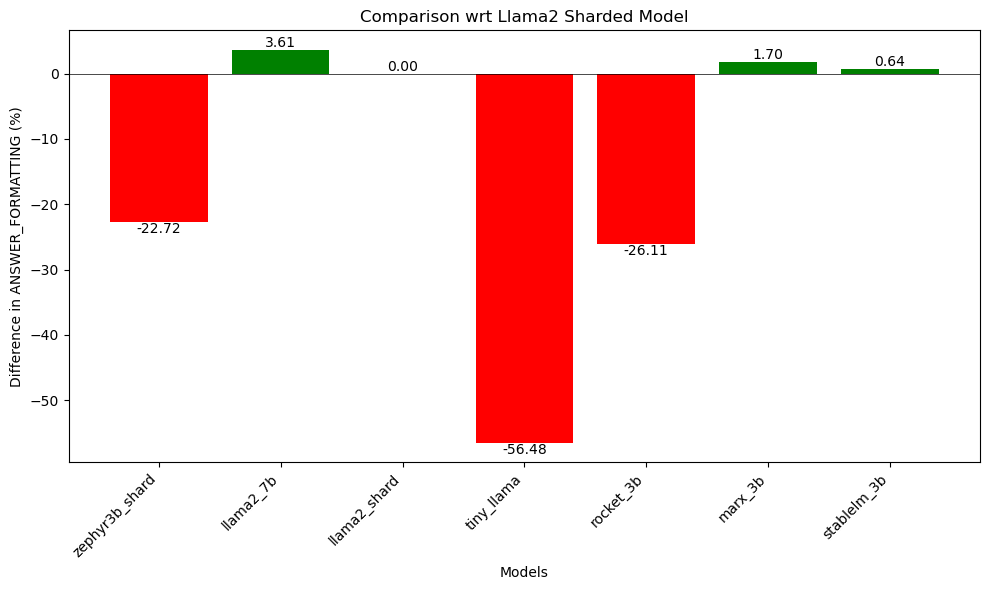

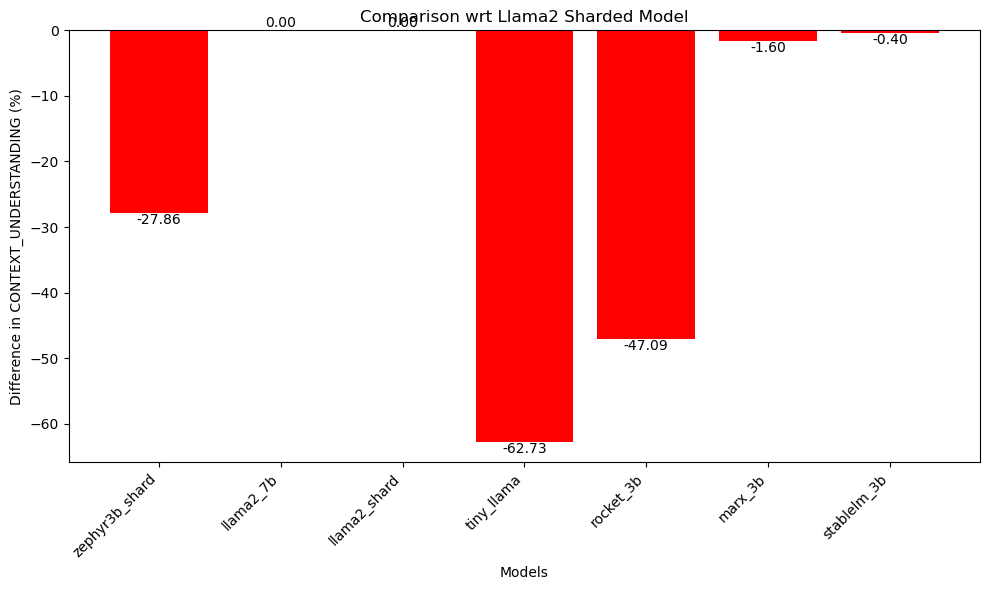

In [43]:
import matplotlib.pyplot as plt
models = data.columns[1:8]

for param in params:
    difference = []
    tmp = 'llama2_shard_eval' + param
    base = sum(data[tmp])

    for col in data.columns:
        if param in col:
            diff = round(100* (sum(data[col]) - base)/base, 2)
            difference.append(diff)

    colors = ['red' if score < 0 else 'green' for score in difference]

    plt.figure(figsize=(10, 6))
    plt.bar(models, difference, color=colors)

    plt.xlabel('Models')
    plt.ylabel(f'Difference in {param.upper()} (%)')
    plt.title('Comparison wrt Llama2 Sharded Model')

    plt.axhline(0, color='black', linewidth=0.5)

    for i, val in enumerate(difference):
        plt.text(i, val, f'{val:.2f}', ha='center', va='bottom' if val >= 0 else 'top', color='black')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


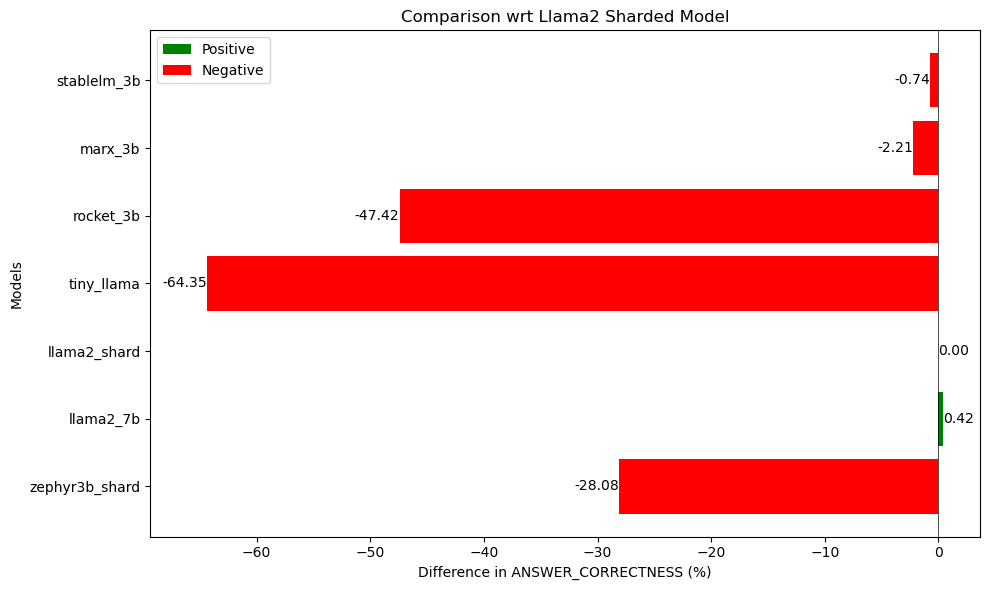

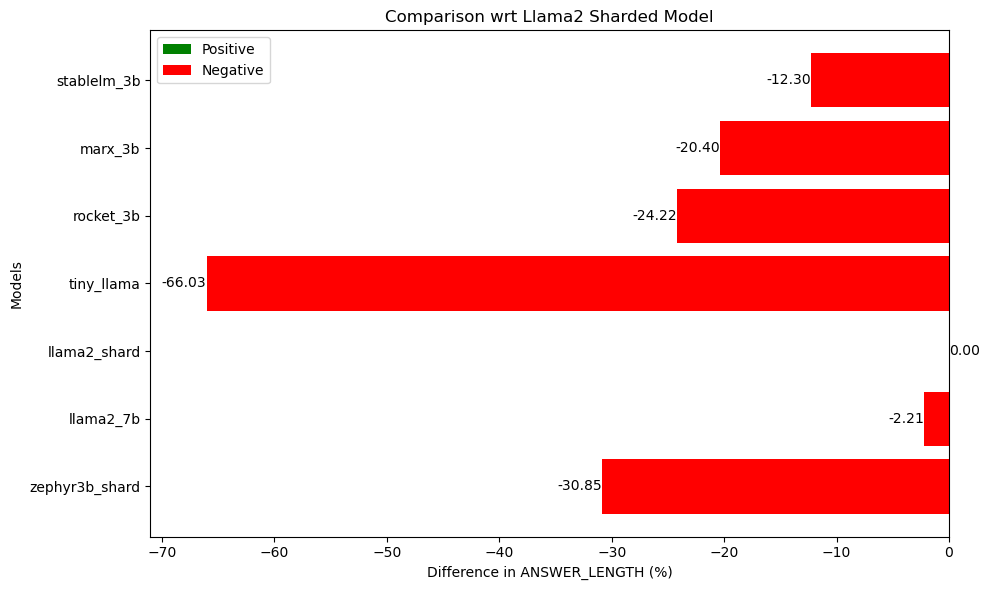

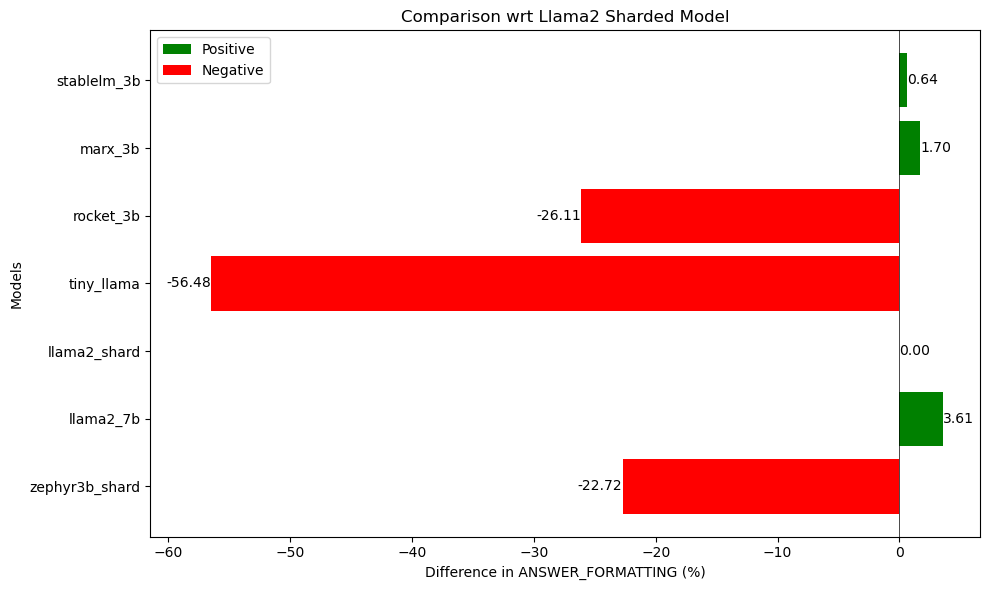

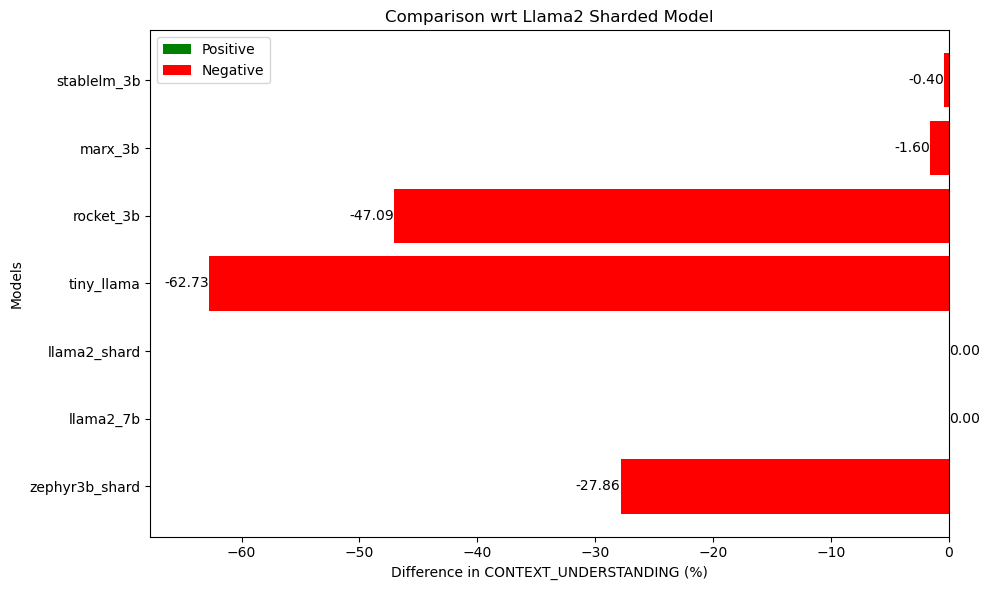

In [56]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

models = data.columns[1:8]

for param in params:
    difference = []
    tmp = 'llama2_shard_eval' + param
    base = sum(data[tmp])

    for col in data.columns:
        if param in col:
            diff = round(100 * (sum(data[col]) - base) / base, 2)
            difference.append(diff)

    colors = ['red' if score < 0 else 'green' for score in difference]

    plt.figure(figsize=(10, 6))
    plt.barh(models, difference, color=colors)

    plt.ylabel('Models')
    plt.xlabel(f'Difference in {param.upper()} (%)')
    plt.title('Comparison wrt Llama2 Sharded Model')

    plt.axvline(0, color='black', linewidth=0.5)

    for i, val in enumerate(difference):
        plt.text(val, i, f'{val:.2f}', va='center', ha='left' if val >= 0 else 'right', color='black')

    plt.tight_layout()

    # Create custom legend handles and labels
    legend_handles = [Patch(facecolor='green', label='Positive'), Patch(facecolor='red', label='Negative')]
    plt.legend(handles=legend_handles, loc='upper left')

    # Add extra whitespace to the left of the y-axis
    plt.xlim(left=min(min(difference), 0) - 5)


    plt.savefig(f'{param}_comparison.jpg', format='jpg')
    plt.show()
